In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, ComplexHeatmap, factoextra, FactoMineR, VIM, missMDA) 

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
pbmc_hla_v_j_gliph <- readr::read_rds(paste0(datapath, "/int_pbmc_hla_v_j_gliph.rds"))

In [7]:
# cfdna_hla_v_j_gliph <- readr::read_rds(paste0(datapath, "/int_cfdna_hla_v_j_gliph.rds"))

In [8]:
rownames(pbmc_hla_v_j_gliph) <- pbmc_hla_v_j_gliph$sample_id

In [9]:
dim(pbmc_hla_v_j_gliph)

[1]  534 8829

In [10]:
table(pbmc_hla_v_j_gliph$Relapse)


  0   1 
431 103 

In [11]:
head(pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%TDT,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cols_flow <- c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')
cols_others <- c("observed_Shannon")

In [13]:
pbmc_hla_v_j_gliph$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph$cycle))

In [14]:
mymat <- pbmc_hla_v_j_gliph[, c(cols_flow, cols_others)]

In [15]:
rownames(mymat) <- pbmc_hla_v_j_gliph[["sample_id"]]
# remove rows with all NAs
mymat <- mymat[rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[rowSums(mymat, na.rm = TRUE) != 0, ]


In [16]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[rownames(mymat), ]

In [17]:
mymat_narm <- mymat[rowSums(is.na(mymat)) == 0, ]

In [18]:
# myvars <- sort(Rfast::colVars(mymat_narm), decreasing = TRUE)
# mymat_narm <- mymat_narm[, names(myvars)[myvars > 0]]

In [19]:
df_narm <- pbmc_hla_v_j_gliph[rownames(mymat_narm), ]

In [20]:
head(df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,0,2
CHP_343_03,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0,0,0,0,0,0,0,0,0,3
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,0,4
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,0,5
CHP_346_01,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,0,1
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
dim(df_narm)

[1]   97 8830

In [22]:
head(mymat_narm)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,459.04,0.0000000,6.6079295,23.4361233,1.40969163,68.546256,12.158590,33.127753,12.158590,21.422
CHP_343_03,370.30,0.2424242,3.9393939,82.0000000,0.96969697,12.848485,36.060606,8.000000,36.060606,26.992
CHP_343_04,536.63,1.5313936,1.3016845,46.5543645,5.58958652,45.022971,45.022971,16.768760,45.022971,28.222
CHP_343_05,371.20,1.2315271,0.7389163,27.0525452,6.23973727,64.737274,20.402299,26.929392,20.402299,26.774
CHP_346_01,331.70,94.6624804,0.1569859,0.7849294,0.00000000,4.395604,5.180534,3.767661,5.180534,29.129
CHP_347_01,126.72,21.1640212,0.0000000,0.2351558,0.05878895,78.542034,17.930629,2.410347,17.930629,106.911


In [23]:
# # Get median of mymat_narm columns for each cancergroup using df_narm
# medians <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, median, na.rm = TRUE))
# mads <- apply(mymat_narm, 2, function(x) tapply(x, df_narm$cancergroup, mad, na.rm = TRUE))

In [24]:
head(mymat_narm)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,459.04,0.0000000,6.6079295,23.4361233,1.40969163,68.546256,12.158590,33.127753,12.158590,21.422
CHP_343_03,370.30,0.2424242,3.9393939,82.0000000,0.96969697,12.848485,36.060606,8.000000,36.060606,26.992
CHP_343_04,536.63,1.5313936,1.3016845,46.5543645,5.58958652,45.022971,45.022971,16.768760,45.022971,28.222
CHP_343_05,371.20,1.2315271,0.7389163,27.0525452,6.23973727,64.737274,20.402299,26.929392,20.402299,26.774
CHP_346_01,331.70,94.6624804,0.1569859,0.7849294,0.00000000,4.395604,5.180534,3.767661,5.180534,29.129
CHP_347_01,126.72,21.1640212,0.0000000,0.2351558,0.05878895,78.542034,17.930629,2.410347,17.930629,106.911


In [25]:
head(df_narm)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,0,0,0,0,0,0,0,0,2
CHP_343_03,CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,0,0,0,0,0,0,0,0,0,3
CHP_343_04,CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,0,0,0,0,0,0,0,0,0,4
CHP_343_05,CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,0,0,0,0,0,0,0,0,0,5
CHP_346_01,CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,0,1
CHP_347_01,CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# scale each column by the median of the cancergroup in medians
# mymat_narm_scaled <- mymat_narm
# for(i in 1:nrow(mymat_narm)){
#   mymat_narm_scaled[i, ] <- mymat_narm[i, ]/medians[df_narm$cancergroup[i], ]#/ mads[df_narm$cancergroup[i], ]
# }

In [27]:
pca <- prcomp(mymat_narm, center = T, scale. = T)

In [28]:
p1 <- fviz_pca_ind(pca,
     col.ind = as.vector(df_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

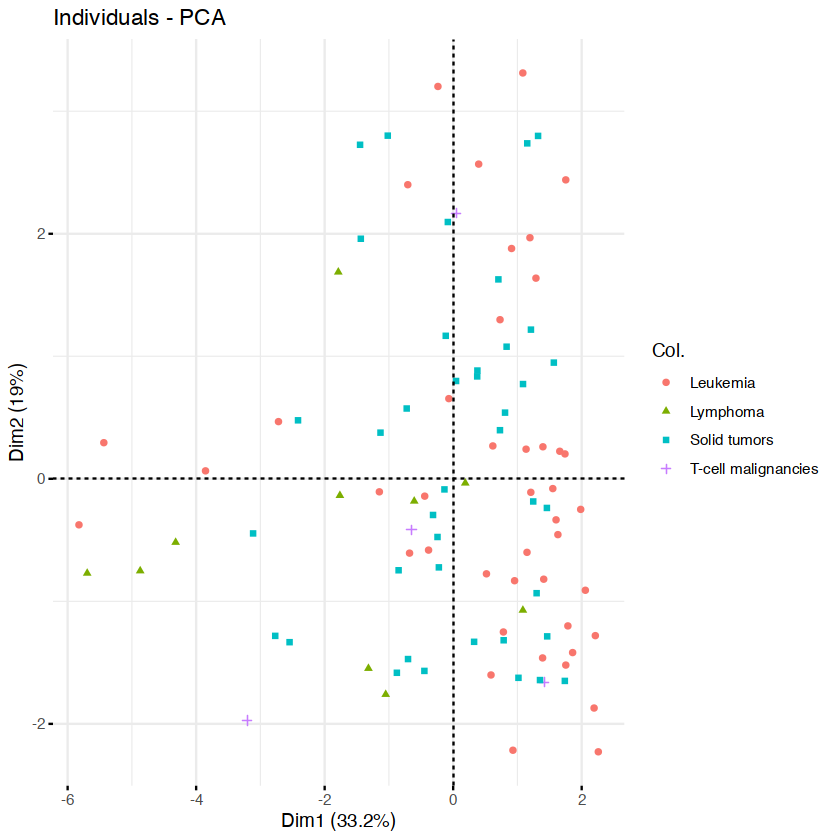

In [29]:
p1

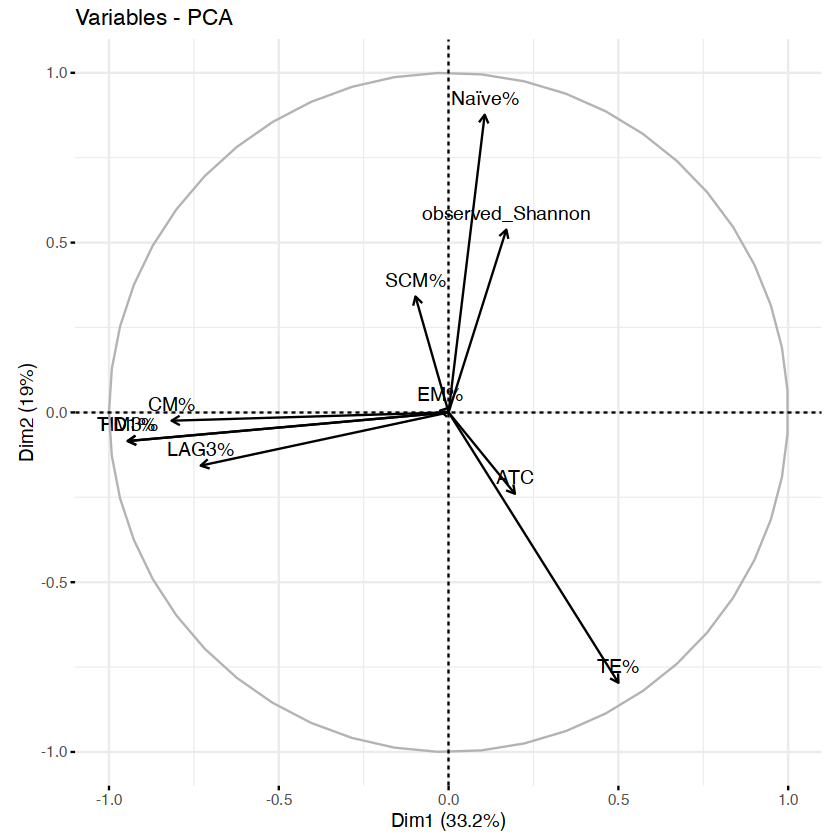

In [30]:
fviz_pca_var(pca)

In [31]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [32]:
table(df_narm$Patient[df_narm$Relapse == 1])


CHP_349 CHP_353 CHP_356 CHP_364 CHP_368 CHP_390 CHP_411 CHP_413 CHP_418 
      2       3       3       3       1       1       1       2       1 

In [33]:
mydist <- as.matrix(dist(pca$x[,1:2])) 

In [34]:
# order df_narm
df_narm <- df_narm %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(df_narm$Patient) > 1))

In [35]:
dim(df_narm)

[1]   97 8832

In [36]:
df_narm$Dim1 <- pca$x[,1][match( df_narm$sample_id, rownames(pca$x))]
df_narm$Dim2 <- pca$x[,2][match( df_narm$sample_id, rownames(pca$x))]

In [37]:
df_narm$dist <- NA
df_narm$quantreg <- NA
df_narm$quantreg1 <- NA
df_narm$quantreg2 <- NA

In [38]:
for (i in pts) {
    tmp <- df_narm[df_narm$Patient == i, ]

# quantreg
tmp <- tmp %>% mutate(quantreg_n = quantreg::rq(Dim2 ~ Dim1, tau = 0.5)$coef[2] / n())
tmp <- tmp %>% mutate(quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau = 0.5)$coef[2] / n())
tmp <- tmp %>% mutate(quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau = 0.5)$coef[2] / n())
    # distances
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    df_narm$dist[df_narm$Patient == i] <- tmp$dist
    df_narm$quantreg[df_narm$Patient == i] <- tmp$quantreg_n
    df_narm$quantreg1[df_narm$Patient == i] <- tmp$quantreg_n1
    df_narm$quantreg2[df_narm$Patient == i] <- tmp$quantreg_n2
}


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
Caused by warning in `rq.fit.br()`:
! So

In [39]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%YE,%G,%E,cyclenum,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,1,1.1528760,2.7379150,NA,NA,NA,NA
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,1,0.9560215,-0.8316722,NA,-0.01345430,-0.11178772,-0.16848748
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,1,0.7284483,0.3967528,NA,0.44827013,-0.48605209,-0.43576527
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,1,1.8591443,-1.4181300,NA,-0.21810580,-1.50386731,0.65600437
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,1,1.5666157,0.9483792,NA,0.07299216,-0.08247636,0.05737364
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,1,1.7527945,-1.5201639,NA,NA,NA,NA


In [40]:
allpts <- as.data.frame(table(df_narm$Patient), stringsAsFactors = F)
df_narm$dist[df_narm$dist == 0] <- NA

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(df_narm[df_narm$Patient == allpts$Var1[i], ])
    allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1 # add 1 for the first sample, this is the number of samples with a distance
}
allpts$sumdist_n <- allpts$sumdist / allpts$samplecount
allpts$meddist_n <- allpts$meddist / allpts$samplecount
allpts_no0 <- allpts[allpts$sumdist_n > 0, ]
allpts_no0 <- allpts_no0[allpts_no0$Freq > 1, ]

mysample_df <- df_narm[df_narm$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]
mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]
mypatients$meddist <- allpts_no0$meddist[match(mypatients$Patient, allpts_no0$Var1)]


In [41]:
df_narm$meddist_n <- mypatients$meddist_n[match(df_narm$Patient, mypatients$Patient)]

In [42]:
summary(mypatients$meddist_n)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2807  0.5745  0.6931  0.8648  1.0616  1.8641 

In [43]:
mypatients[ order(mypatients$meddist_n), ]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cyclenum,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2,meddist_n,meddist
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_391_02,CHP_391,X02,1.5,18.20,10,HR ALL,1.5,2456,230,...,0,2,1.20863285,-0.11012797,NA,0.3716894475,0.22531025,0.16749089,0.2807453,0.5614905
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,1,1.56661570,0.94837918,NA,0.0729921632,-0.08247636,0.05737364,0.4027098,2.0135488
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,0,2,-0.44785925,-1.56775889,NA,-0.0308024317,-0.29015979,-0.07532030,0.4792046,1.9168186
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,1,0.61736723,0.26841212,NA,-0.0008721045,-0.06617686,0.00263992,0.5518933,2.7594667
CHP_413_01,CHP_413,X01,4.0,0.00,19,AML,4.0,1985,43,...,0,1,0.58903722,-1.60091863,NA,0.8933473335,0.28009405,0.50044255,0.5734941,1.1469881
CHP_398_04,CHP_398,X04,1.0,0.00,6,ALL,1.0,2395,627,...,0,4,-0.44261851,-0.14151261,NA,-0.3299006192,0.48034956,-0.31693524,0.5754856,1.1509711
CHP_408_01,CHP_408,X01,5.1,338.80,5,OS,5.1,2140,338,...,0,1,0.04519578,0.79843721,NA,0.1195051653,-0.17717911,0.33370958,0.6126847,1.8380541
CHP_362_01,CHP_362,X01,10.2,1072.50,16,OS,10.2,2489,115,...,0,1,-0.13575972,-0.08639769,NA,0.0999931725,-0.25318187,0.06265540,0.6268568,1.2537136
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,1,0.72844825,0.39675281,NA,0.4482701307,-0.48605209,-0.43576527,0.6527925,1.3055849


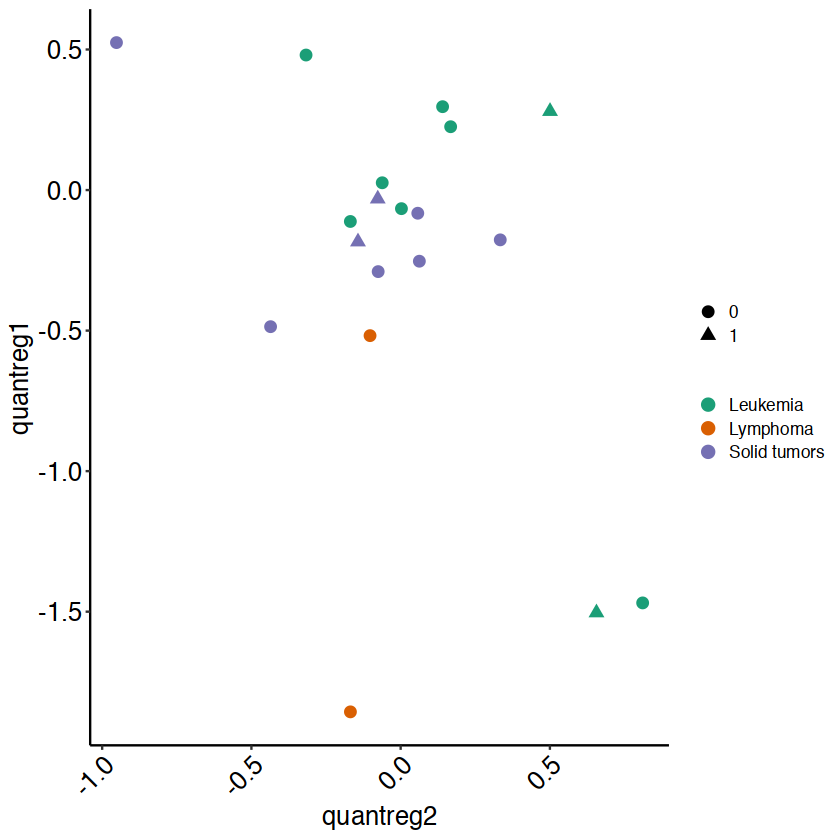

In [48]:
ggplot(data = mypatients, aes(x = quantreg2, y = quantreg1, shape = as.factor(Relapse)))  + 
geom_point(aes(color = cancergroup), alpha = 1, size = 3) + 
# geom_text(data = df_narm[df_narm$Patient %in% c( "CHP_413"),], aes(label = Patient), size = 3, nudge_x = 0.1, nudge_y = 0.1) +
myplot + myaxis + #theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
scale_color_manual(values =  group_col) 

In [49]:
table(df_narm$Patient ) 


CHP_343 CHP_346 CHP_347 CHP_348 CHP_349 CHP_350 CHP_351 CHP_352 CHP_353 CHP_354 
      4       1       5       2       2       5       1       1       3       1 
CHP_356 CHP_357 CHP_358 CHP_361 CHP_362 CHP_363 CHP_364 CHP_365 CHP_367 CHP_368 
      3       5       1       3       3       1       3       1       1       1 
CHP_369 CHP_370 CHP_371 CHP_372 CHP_373 CHP_375 CHP_378 CHP_381 CHP_383 CHP_385 
      1       1       1       1       1       1       2       1       2       1 
CHP_387 CHP_390 CHP_391 CHP_393 CHP_394 CHP_396 CHP_397 CHP_398 CHP_399 CHP_400 
      2       1       2       1       2       2       2       2       3       1 
CHP_403 CHP_404 CHP_405 CHP_407 CHP_408 CHP_409 CHP_410 CHP_411 CHP_413 CHP_414 
      1       1       3       2       3       2       1       1       2       1 
CHP_415 CHP_418 CHP_419 
      1       1       1 

In [61]:
table(df_narm$Patient[df_narm$Relapse == 0])


CHP_343 CHP_346 CHP_347 CHP_348 CHP_350 CHP_351 CHP_352 CHP_354 CHP_357 CHP_358 
      4       1       5       2       5       1       1       1       5       1 
CHP_361 CHP_362 CHP_363 CHP_365 CHP_367 CHP_369 CHP_370 CHP_371 CHP_372 CHP_373 
      3       3       1       1       1       1       1       1       1       1 
CHP_375 CHP_378 CHP_381 CHP_383 CHP_385 CHP_387 CHP_391 CHP_393 CHP_394 CHP_396 
      1       2       1       2       1       2       2       1       2       2 
CHP_397 CHP_398 CHP_399 CHP_400 CHP_403 CHP_404 CHP_405 CHP_407 CHP_408 CHP_409 
      2       2       3       1       1       1       3       2       3       2 
CHP_410 CHP_414 CHP_415 CHP_419 
      1       1       1       1 

In [51]:
head(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%G,%E,cyclenum,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2,meddist_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,1,1.1528760,2.7379150,NA,NA,NA,NA,NA
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,1,0.9560215,-0.8316722,NA,-0.01345430,-0.11178772,-0.16848748,0.7204043
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,1,0.7284483,0.3967528,NA,0.44827013,-0.48605209,-0.43576527,0.6527925
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,1,1.8591443,-1.4181300,NA,-0.21810580,-1.50386731,0.65600437,1.6407189
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,1,1.5666157,0.9483792,NA,0.07299216,-0.08247636,0.05737364,0.4027098
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,1,1.7527945,-1.5201639,NA,NA,NA,NA,NA


In [52]:
# summary(df_narm$quantreg)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
-2.694520 -0.218106 -0.000872  0.298233  0.119505 14.333340        28 

In [63]:
df_narm$prepost <- NA
df_narm$prepost[ df_narm$cycle == "X01"] <- "Pre"
df_narm$prepost[ df_narm$cycle != "X01"] <- "Post"

In [64]:
dimplot_pt <- function(df, pt){
   p1 <- ggplot(data = df, aes(x = Dim1, y = Dim2,  shape = as.factor(prepost)))  + 
geom_point(aes(color = cancergroup), alpha = 1, size = 3) + 
# geom_text(data = df_narm[df_narm$Patient %in% c( "CHP_418"),], aes(label = Patient), size = 3, nudge_x = 0.1, nudge_y = 0.1) +
 geom_path(data = df_narm[df_narm$Patient == pt,], aes(group = Patient), #color = c("red", "black"),
 arrow = arrow(length=unit(0.30,"cm"), ends="last", type = "closed")) +
myplot + myaxis + theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
scale_color_manual(values =  group_col) + geom_hline(yintercept = 0,  linetype = "dashed") +
geom_vline(xintercept = 0,  linetype = "dashed") + ggtitle(pt)
return(p1)
}

In [65]:
for( i in c("CHP_353", "CHP_356", "CHP_364", "CHP_362", "CHP_361", "CHP_399", "CHP_408", "CHP_405")){
    pdf(paste0(plotpath, "PCAplot_", i, ".pdf"))
    print(dimplot_pt(df_narm, i))
    dev.off()
}

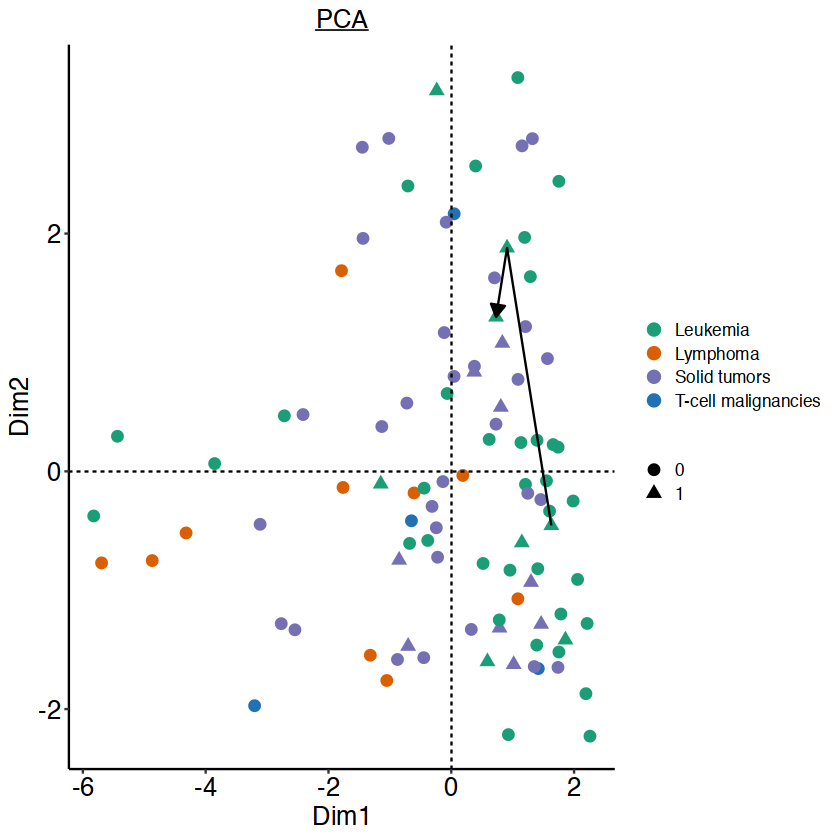

In [54]:
ggplot(data = df_narm, aes(x = Dim1, y = Dim2,  shape = as.factor(Relapse)))  + 
geom_point(aes(color = cancergroup), alpha = 1, size = 3) + 
# geom_text(data = df_narm[df_narm$Patient %in% c( "CHP_418"),], aes(label = Patient), size = 3, nudge_x = 0.1, nudge_y = 0.1) +
 geom_path(data = df_narm[df_narm$Patient %in% c( "CHP_353"),], aes(group = Patient), #color = c("red", "black"),
 arrow = arrow(length=unit(0.30,"cm"), ends="last", type = "closed")) +
myplot + myaxis + theme(axis.text.x = element_text(angle = 0, hjust = 0.5)) +
scale_color_manual(values =  group_col) + geom_hline(yintercept = 0,  linetype = "dashed") +
geom_vline(xintercept = 0,  linetype = "dashed") + ggtitle(expression(underline("PCA"))) 

In [68]:
tail(df_narm)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cyclenum,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2,meddist_n,prepost
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CHP_357_05,CHP_357,X05,2.9,0.00,1,AML,2.9,611,8,...,0,5,-0.70616989,2.4003769,3.919579,-0.0008721045,-0.06617686,0.00263992,0.5518933,Post
CHP_375_05,CHP_375,X05,0.5,0.00,14,T-ALL,0.5,1481,6,...,0,5,-3.20318658,-1.9718182,NA,NA,NA,NA,NA,Post
CHP_383_05,CHP_383,X05,0.8,0.00,8,ALL,0.8,353,1,...,0,5,-0.06711793,0.6544565,NA,-0.2269388889,-0.40441987,0.18355719,NA,Post
CHP_390_05,CHP_390,X05,0.0,791.48,5,OS,0.0,2506,307,...,0,5,0.37416339,0.8357395,NA,NA,NA,NA,NA,Post
CHP_397_05,CHP_397,X05,1.5,0.00,2,ALL,1.5,2527,98,...,0,5,0.78158753,-1.2500691,NA,0.3431974884,-0.07844783,-0.05384619,NA,Post
CHP_398_05,CHP_398,X05,4.3,0.00,6,ALL,4.3,3100,1,...,0,5,0.51808062,-0.7753831,1.150971,-0.3299006192,0.48034956,-0.31693524,0.5754856,Post


In [85]:
df_narm_pre_post <- df_narm[df_narm$cycle %in% c("X02"), ]
df_narm_pre_post$dist_pre <- df_narm_pre_post$dist

df_narm_pre_post$dist_post <- NA
for (i in 1:nrow(df_narm_pre_post)) {
    tm <- df_narm$dist[df_narm$Patient == df_narm_pre_post$Patient[i] & df_narm$cycle != "X02"]
    if(sum(is.na(tm)) == length(tm)){
        df_narm_pre_post$dist_post[i] <- NA}
    else{
    df_narm_pre_post$dist_post[i] <- mean(tm, na.rm = T)
}  
}

In [86]:
df_narm[ df_narm$Patient == "CHP_348",]

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,%E,cyclenum,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2,meddist_n,prepost
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,1,0.7284483,0.3967528,NA,0.4482701,-0.4860521,-0.4357653,0.6527925,Pre
CHP_348_02,CHP_348,X02,3.2,437.50,18,OS,3.2,2379,61,...,0,2,-0.2436559,-0.4747777,1.305585,0.4482701,-0.4860521,-0.4357653,0.6527925,Post


In [87]:
head(df_narm_pre_post)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,Dim1,Dim2,dist,quantreg,quantreg1,quantreg2,meddist_n,prepost,dist_pre,dist_post
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,-0.4478593,-1.5677589,NA,-0.03080243,-0.29015979,-0.07532030,0.4792046,Post,NA,1.904389
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,0.3970829,2.5684987,3.445805,-0.01345430,-0.11178772,-0.16848748,0.7204043,Post,3.445805,5.043518
CHP_348_02,CHP_348,X02,3.2,437.50,18,OS,3.2,2379,61,...,-0.2436559,-0.4747777,1.305585,0.44827013,-0.48605209,-0.43576527,0.6527925,Post,1.305585,NA
CHP_349_02,CHP_349,X02,13.0,353.06,17,CML,13.0,2767,717,...,-1.1485904,-0.1061213,3.281438,-0.21810580,-1.50386731,0.65600437,1.6407189,Post,3.281438,NA
CHP_350_02,CHP_350,X02,39.5,0.00,1,HB,39.5,2368,26,...,1.3213678,2.7986484,1.866452,0.07299216,-0.08247636,0.05737364,0.4027098,Post,1.866452,2.283024
CHP_356_02,CHP_356,X02,1.1,0.00,9,EWS,1.1,1028,66,...,1.2987759,-0.9334167,NA,0.08955144,-0.03141932,-0.07674195,1.0361132,Post,NA,2.072226


In [91]:
table(df_narm_pre_post$Relapse)


 0  1 
15  6 

Warning message:
“Removed 14 rows containing missing values (`geom_point()`).”


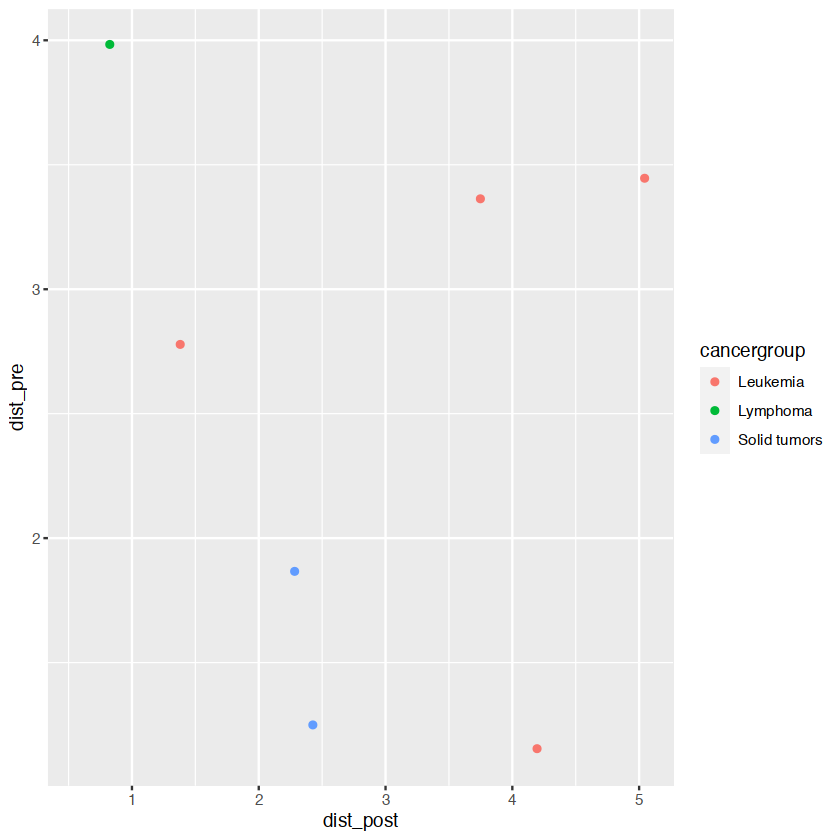

In [99]:
ggplot(data = df_narm_pre_post, aes(x = dist_post, y = dist_pre) ) + 
geom_point(aes(color = cancergroup)) 

In [63]:
t.test(df_narm$Dim1[df_narm$Relapse == 1], df_narm$Dim1[df_narm$Relapse == 0])
t.test(df_narm$Dim2[df_narm$Relapse == 1], df_narm$Dim2[df_narm$Relapse == 0])


	Welch Two Sample t-test

data:  df_narm$Dim1[df_narm$Relapse == 1] and df_narm$Dim1[df_narm$Relapse == 0]
t = 2.4685, df = 55.124, p-value = 0.0167
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1410035 1.3575746
sample estimates:
 mean of x  mean of y 
 0.6179704 -0.1313187 



	Welch Two Sample t-test

data:  df_narm$Dim2[df_narm$Relapse == 1] and df_narm$Dim2[df_narm$Relapse == 0]
t = -0.51694, df = 22.945, p-value = 0.6101
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9720329  0.5833955
sample estimates:
  mean of x   mean of y 
-0.16026284  0.03405585 


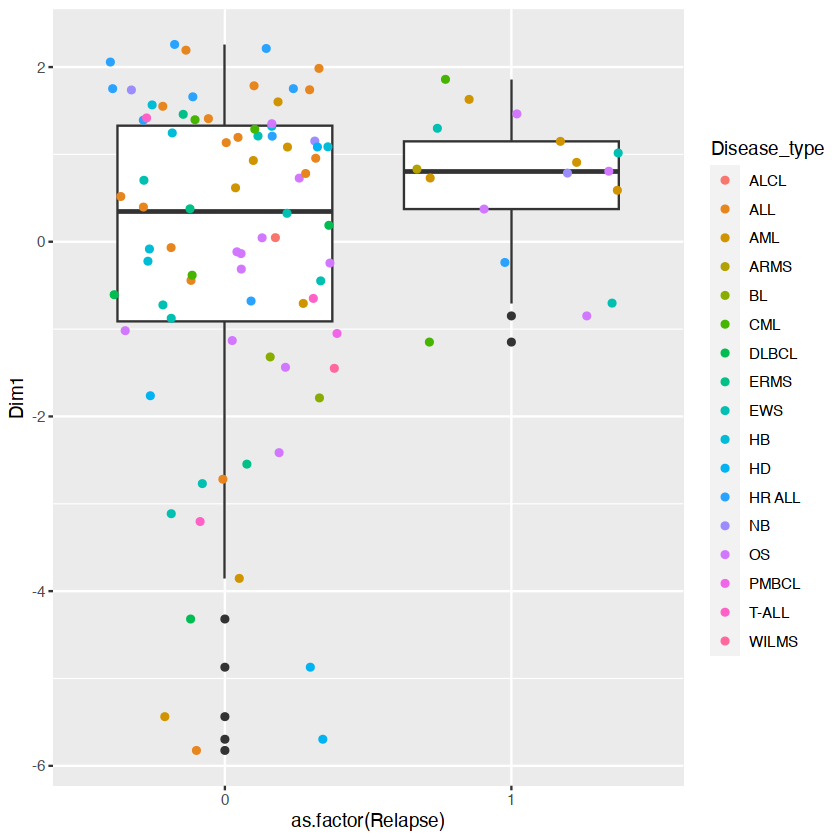

In [197]:
ggplot(data = df_narm, aes(x = as.factor(Relapse), y = Dim1) ) + geom_boxplot() +
geom_jitter(aes(color = Disease_type)) 

# Impute with missMDA

In [17]:
set.seed(123)
res.comp <- imputePCA(mymat, ncp = 5, maxiter = 1000)

In [18]:
res.pca <- PCA(res.comp$completeObs, quali.sup = NULL, ncp = 5, graph = FALSE) 

In [19]:
head(res.comp$completeObs)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon
CHP_319_05,0.00,13.71900,10.586455,15.90337,4.876446,54.94216,24.32371,13.91138,24.35907,11.878
CHP_323_03,786.24,14.22209,9.849054,16.15021,4.812524,54.99333,21.04305,12.86386,21.02054,37.722
CHP_323_05,979.50,17.06647,8.858393,15.74125,4.700990,53.65777,18.83897,12.08986,18.82162,81.753
CHP_324_05,0.00,22.24261,8.050705,14.43207,4.576250,50.71865,19.94497,12.29320,20.04107,129.919
CHP_328_04,130.82,28.79103,6.004779,13.35724,4.337932,47.52385,16.07806,10.89160,16.21061,223.747
CHP_328_05,91.16,19.00862,8.944665,15.02900,4.684792,52.35595,21.25592,12.79678,21.32186,87.321


In [20]:
p1 <- fviz_pca_ind(res.pca,
     habillage = as.factor(pbmc_hla_v_j_gliph$cancergroup),
    # remove labels
    label = "none",
    repel = F, addEllipses = FALSE, mean.point = FALSE
)

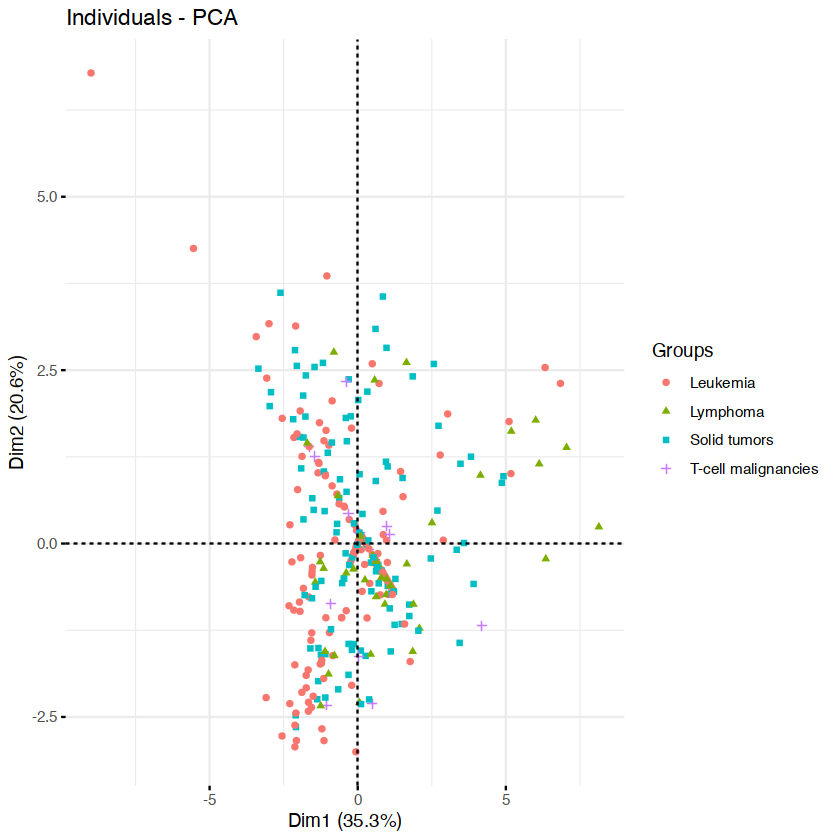

In [21]:
p1

In [22]:
myx <- res.pca$ind$coord
# myx <- prcomp(missforest_mymat$ximp)$x
mydist <- as.matrix(dist(myx[, 1:2])) 

In [23]:
head(myx)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
CHP_319_05,1.1758235,-0.66017794,-0.32090267,0.14238057,-0.3806131
CHP_323_03,0.7604305,-0.73986012,-0.14442888,-0.01932204,0.4043838
CHP_323_05,0.4051864,-0.57429598,-0.04063838,-0.07440812,0.5898525
CHP_324_05,0.3827760,-0.08012999,-0.13163860,0.09432539,-0.4040646
CHP_328_04,-0.2878248,0.34654784,0.04127118,0.03097288,-0.2912382
CHP_328_05,0.6409358,-0.31341774,-0.18428253,0.09413868,-0.3039904


In [24]:
sample_df <- pbmc_hla_v_j_gliph %>%
    group_by(Patient) %>%
    # order cyclenum
    arrange(cyclenum) %>%
    ungroup()
pts <- names(which(table(sample_df$Patient) > 1))


In [25]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SG%GE,G%TE,G%SYE,S%P,G%GE,S%G,%YE,%G,%E,cyclenum
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,0,0,0,0,1
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,0,0,0,0,1
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,0,0,0,0,1
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,0,0,0,0,1
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,0,0,0,0,1
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,0,0,0,0,0,1


In [26]:
sample_df$Dim1 <- myx[,1][match( sample_df$sample_id, rownames(myx))]
sample_df$Dim2 <- myx[,2][match( sample_df$sample_id, rownames(myx))]
# sample_df$dist <- NA

In [27]:
sample_df$dist <- NA
sample_df$quantreg <- NA
# sample_df$quantreg1 <- NA
# sample_df$quantreg2 <- NA

In [28]:
for (i in pts) {
    tmp <- sample_df[sample_df$Patient == i, ]

    # quantreg
tmp <- tmp %>% mutate(quantreg_n = quantreg::rq(Dim2 ~ Dim1, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n1 = quantreg::rq(Dim1 ~ cyclenum, tau = 0.5)$coef[2] / n())
# tmp <- tmp %>% mutate(quantreg_n2 = quantreg::rq(Dim2 ~ cyclenum, tau = 0.5)$coef[2] / n())

    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df$dist[sample_df$Patient == i] <- tmp$dist
    sample_df$quantreg[sample_df$Patient == i] <- tmp$quantreg_n
    # sample_df$quantreg1[sample_df$Patient == i] <- tmp$quantreg_n1
    # sample_df$quantreg2[sample_df$Patient == i] <- tmp$quantreg_n2
}


In [112]:
# head(allpts)

In [29]:
allpts <- as.data.frame(table(sample_df$Patient), stringsAsFactors = F)
sample_df$dist[sample_df$dist == 0] <- NA

allpts$sumdist <- NA
allpts$meddist <- NA
allpts$samplecount <- NA

for (i in 1:nrow(allpts)) {
    tmp <- as.data.frame(sample_df[sample_df$Patient == allpts$Var1[i], ])
    allpts$sumdist[i] <- sum(tmp[tmp$dist != 0, "dist"], na.rm = T)
    allpts$meddist[i] <- median(tmp[tmp$dist != 0, "dist"], na.rm = T)
    # count number of samples for meddist
    allpts$samplecount[i] <- nrow(tmp[!is.na(tmp$dist), ]) + 1 # add 1 for the first sample, this is the number of samples with a distance
}
allpts$sumdist_n <- allpts$sumdist / allpts$samplecount
allpts$meddist_n <- allpts$meddist / allpts$samplecount
allpts_no0 <- allpts[allpts$sumdist_n > 0, ]
allpts_no0 <- allpts_no0[allpts_no0$Freq > 1, ]

mysample_df <- sample_df[sample_df$Patient %in% allpts_no0$Var1, ]
mypatients <- mysample_df[!duplicated(mysample_df$Patient), ]

mypatients$meddist_n <- allpts_no0$meddist_n[match(mypatients$Patient, allpts_no0$Var1)]


In [32]:
(allpts_no0)

,Var1,Freq,sumdist,meddist,samplecount,sumdist_n,meddist_n
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,CHP_323,4,1.6130196,0.80650981,3,0.53767320,0.26883660
4,CHP_325,3,0.3025886,0.15129431,3,0.10086288,0.05043144
5,CHP_326,5,0.7890309,0.11900047,5,0.15780618,0.02380009
6,CHP_328,5,2.0068604,0.40051327,5,0.40137209,0.08010265
7,CHP_330,5,10.3231415,3.03919306,5,2.06462830,0.60783861
8,CHP_331,2,0.6363383,0.63633830,2,0.31816915,0.31816915
9,CHP_332,5,7.6544755,1.83908245,5,1.53089510,0.36781649
10,CHP_334,4,0.1911520,0.07638313,4,0.04778800,0.01909578
12,CHP_338,5,5.2157859,1.44004546,5,1.04315718,0.28800909


In [30]:
head(mypatients)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,S%G,%YE,%G,%E,cyclenum,Dim1,Dim2,dist,quantreg,meddist_n
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,1,-0.9541641,-1.28401109,NA,0.09216541,0.6426485
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,1,-0.7139932,0.16238592,NA,-0.18857876,0.6178752
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,1,-1.2083397,-2.67123009,NA,0.61127896,2.1619104
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,1,-1.8316563,0.34808927,NA,-0.12049457,0.4058377
CHP_357_01,CHP_357,X01,1.7,251.00,1,AML,1.7,1382,2,...,0,0,0,0,1,-0.7689761,0.05223209,NA,0.07010041,0.6857486
CHP_361_01,CHP_361,X01,2.4,516.04,13,HD,2.4,2317,94,...,0,0,0,0,1,2.5060131,0.29950330,NA,0.08694873,1.1677006


In [33]:
head(sample_df)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,G%GE,S%G,%YE,%G,%E,cyclenum,Dim1,Dim2,dist,quantreg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_346_01,CHP_346,X01,0.8,331.70,1,NB,0.8,637,0,...,0,0,0,0,0,1,-2.1175109,2.7883021,NA,NA
CHP_347_01,CHP_347,X01,0.8,126.72,13,ALL,0.8,1701,1,...,0,0,0,0,0,1,-0.9541641,-1.2840111,NA,0.09216541
CHP_348_01,CHP_348,X01,11.5,50.96,18,OS,11.5,1125,28,...,0,0,0,0,0,1,-0.7139932,0.1623859,NA,-0.18857876
CHP_349_01,CHP_349,X01,2.0,3152.22,17,CML,2.0,2735,53,...,0,0,0,0,0,1,-1.2083397,-2.6712301,NA,0.61127896
CHP_350_01,CHP_350,X01,2.7,1615.44,1,HB,2.7,1338,18,...,0,0,0,0,0,1,-1.8316563,0.3480893,NA,-0.12049457
CHP_352_01,CHP_352,X01,1.2,763.14,17,HR ALL,1.2,2337,2,...,0,0,0,0,0,1,-1.5622942,-2.3619056,NA,NA


In [34]:
df_narm_pre_post <- sample_df[sample_df$cycle %in% c("X02"), ]
# df_narm_pre_post <- df_narm_pre_post[!is.na(df_narm_pre_post$dist),]
df_narm_pre_post$dist_pre <- df_narm_pre_post$dist

df_narm_pre_post$dist_post <- NA
for (i in 1:nrow(df_narm_pre_post)) {
    tm <- sample_df$dist[sample_df$Patient == df_narm_pre_post$Patient[i] & sample_df$cycle != "X02"]
    if(sum(is.na(tm)) == length(tm)){
        df_narm_pre_post$dist_post[i] <- NA}
    else{
    df_narm_pre_post$dist_post[i] <- median(tm, na.rm = T)
}  
}

In [52]:
df_narm_pre_post[df_narm_pre_post$Patient == "CHP_418",21:42]

N+CM+SCM/TE+EM,PD-1,PDL1,LAG3,TIM3,CTLA4,PD1%,PDL1%,LAG3%,TIM3%,...,PD1 + LAG3 + TIM3,cancergroup,agegroup,foldgroup,Remission,Relapse,Transplant,CART,vital_status,LOF
<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
0.171371,74,NA,50,74,NA,12.73666,NA,8.605852,12.73666,...,NA,Solid tumors,2-4 yrs,Low,1,1,0,0,0,0


In [35]:
df_narm_pre_post$meddist_n <- mypatients$meddist_n[match(df_narm_pre_post$Patient, mypatients$Patient)]
sample_df$meddist_n <- mypatients$meddist_n[match(sample_df$Patient, mypatients$Patient)]

Warning message:
“Removed 20 rows containing missing values (`geom_point()`).”


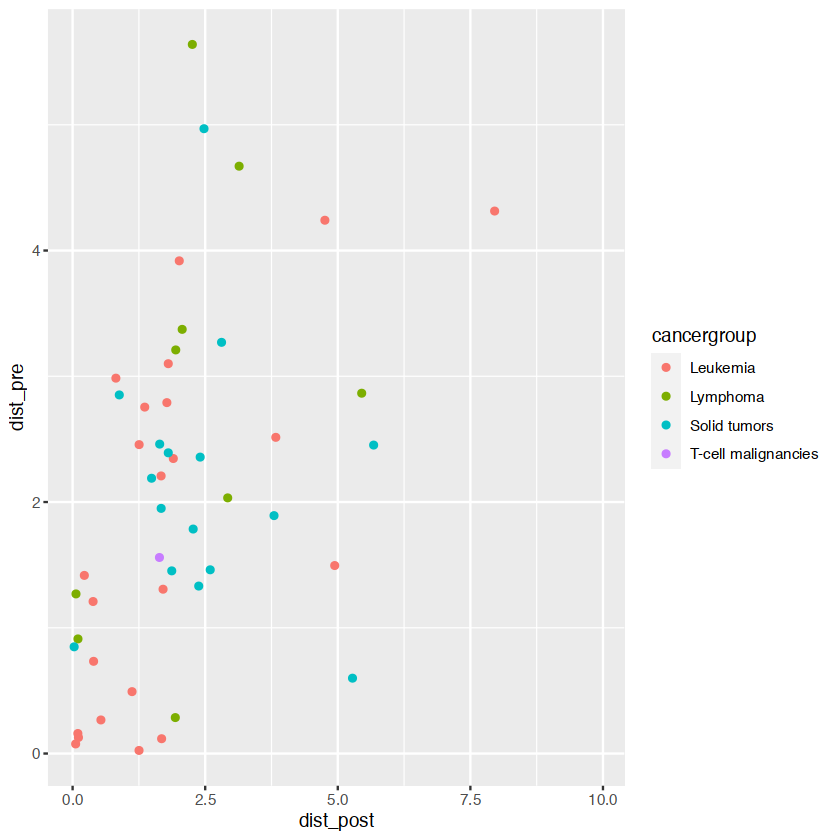

In [44]:
ggplot(data = df_narm_pre_post, aes(x = dist_post, y = dist_pre) ) + geom_point(aes(color = cancergroup))

In [47]:
rms::lrm(Relapse ~ dist_post*cancergroup, data = df_narm_pre_post)

Frequencies of Missing Values Due to Each Variable
    Relapse   dist_post cancergroup 
          0          14           0 

Logistic Regression Model

rms::lrm(formula = Relapse ~ dist_post * cancergroup, data = df_narm_pre_post)


                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            55    LR chi2     15.61     R2       0.403    C       0.824    
 0             45    d.f.            7     R2(7,55) 0.145    Dxy     0.649    
 1             10    Pr(> chi2) 0.0289    R2(7,24.5)0.296    gamma   0.649    
max |deriv| 0.001                          Brier    0.104    tau-a   0.197    

                                            Coef    S.E.     Wald Z Pr(>|Z|)
Intercept                                   -3.3206   1.1166 -2.97  0.0029  
dist_post                                    0.7084   0.2912  2.43  0.0150  
cancergroup=Lymphoma                         3.5535   1.8951

In [39]:
rms::lrm(Relapse ~ meddist_n, data = mypatients)

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n, data = mypatients)

                      Model Likelihood     Discrimination    Rank Discrim.    
                            Ratio Test            Indexes          Indexes    
Obs            80    LR chi2      7.30     R2       0.148    C       0.630    
 0             67    d.f.            1     R2(1,80) 0.076    Dxy     0.261    
 1             13    Pr(> chi2) 0.0069    R2(1,32.7)0.175    gamma   0.261    
max |deriv| 1e-08                          Brier    0.117    tau-a   0.072    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept -2.6363 0.5343 -4.93  <0.0001 
meddist_n  1.0651 0.4015  2.65  0.0080  


In [116]:
rms::lrm(Relapse ~ meddist_n*cancergroup, data = mypatients)

Logistic Regression Model

rms::lrm(formula = Relapse ~ meddist_n * cancergroup, data = mypatients)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs             80    LR chi2     18.95     R2       0.358    C       0.799    
 0              67    d.f.            7     R2(7,80) 0.139    Dxy     0.598    
 1              13    Pr(> chi2) 0.0083    R2(7,32.7)0.306    gamma   0.598    
max |deriv| 0.0003                          Brier    0.095    tau-a   0.165    

                                            Coef      S.E.     Wald Z Pr(>|Z|)
Intercept                                     -3.4854   0.9748 -3.58  0.0003  
meddist_n                                      1.6009   0.5667  2.83  0.0047  
cancergroup=Lymphoma                          52.3575 148.4300  0.35  0.7243  
cancergroup=Solid tumors                       2.1752   1.4129  1.54  0.1237  
cancergroup=T-cell mali

# Impute with miss Forest

In [39]:
pacman::p_load(missForest)

In [54]:
missforest_mymat <- missForest(mymat, maxiter = 100, ntree = 10)

In [55]:
p1 <- fviz_pca_ind(prcomp(missforest_mymat$ximp, center = TRUE, scale. = TRUE),
     habillage = as.factor(pbmc_hla_v_j_gliph$cancergroup),
    # remove labels
    label = "none",
    repel = F, addEllipses = FALSE, mean.point = FALSE
)

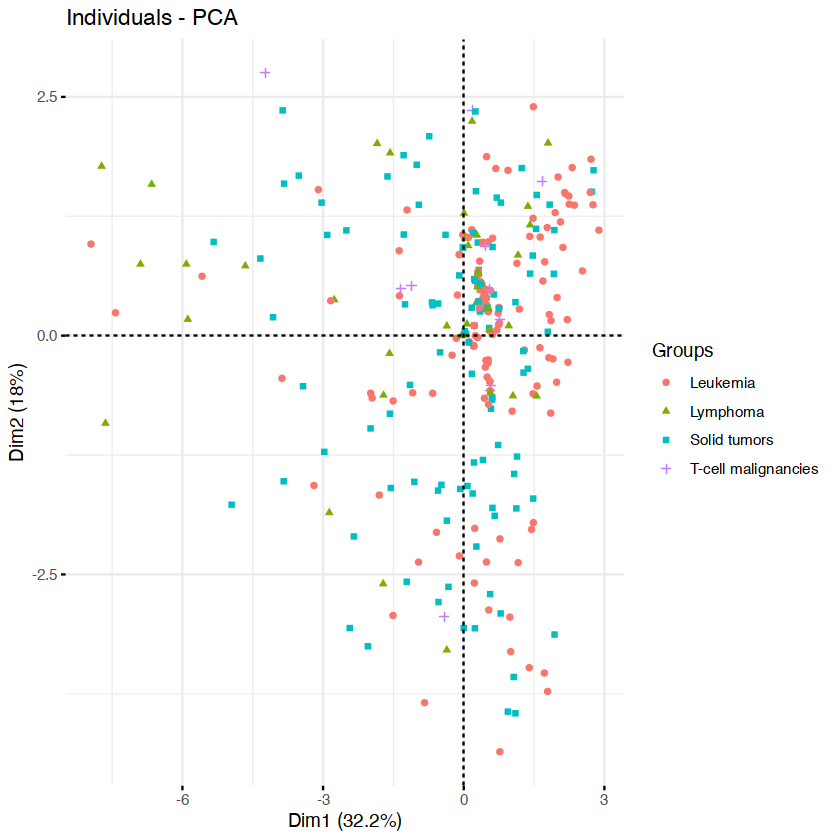

In [56]:
p1

In [212]:
head(missforest_mymat)

,ATC,Naïve_p,SCM_p,CM_p,EM_p,TE_p,PD1_p,LAG3_p,TIM3_p,observed_Shannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,0.00,17.3661796,7.6547855,16.8810951,3.298219,53.967138,19.369118,8.630303,20.081948,11.878
CHP_323_03,786.24,22.2747042,7.1631124,12.4063379,5.004511,56.796537,17.124634,8.753034,16.618011,37.722
CHP_323_05,979.50,25.6269097,6.5535731,11.1224337,3.608383,51.741454,13.739595,10.040031,12.593740,81.753
CHP_324_05,0.00,18.6771271,5.3118633,14.1914251,2.839556,60.031333,18.197065,7.238974,18.248399,129.919
CHP_328_04,130.82,26.2879376,6.5291140,13.2179834,2.766223,42.387415,14.907751,6.151939,14.030911,223.747
CHP_328_05,91.16,20.3733852,6.7214852,13.2894774,2.949333,58.917227,18.699718,7.407993,18.704113,87.321
CHP_330_05,0.00,17.7491621,6.8166620,14.2282850,3.268630,60.098011,18.753667,7.526674,18.627509,91.054
CHP_331_04,0.00,17.5147564,6.4345470,16.2908453,3.487852,56.746543,19.446455,8.502042,20.123658,26.745
CHP_331_05,0.00,17.4639893,6.7599811,14.3070883,3.290490,60.760647,18.487891,7.350559,18.273499,103.194


In [118]:
head(mymat)

,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,11.878
CHP_323_03,786.24,NA,NA,NA,NA,NA,NA,NA,NA,37.722
CHP_323_05,979.50,NA,NA,NA,NA,NA,NA,NA,NA,81.753
CHP_324_05,0.00,NA,NA,NA,NA,NA,NA,NA,NA,129.919
CHP_328_04,130.82,NA,NA,NA,NA,NA,NA,NA,NA,223.747
CHP_328_05,91.16,NA,NA,NA,NA,NA,NA,NA,NA,87.321


In [119]:
colnames(mymat) <- gsub("%", "_p", colnames(mymat))

In [120]:
colnames(pbmc_hla_v_j_gliph) <- gsub("%", "_p", colnames(pbmc_hla_v_j_gliph))

In [ ]:
# ipc_r <- prcomp( formula( paste("~", paste(mycols[!grepl("TIM3", mycols)]) ) ),
# data = sample_df)

In [123]:
f1 <- as.formula( paste("~", paste(colnames(mymat), collapse = "+") ) )

In [124]:
f1

~ATC + Naïve_p + SCM_p + CM_p + EM_p + TE_p + PD1_p + LAG3_p + 
    TIM3_p + observed_Shannon

In [138]:
ptrans <- transcan( f1, 
imputed=TRUE , transformed =TRUE , data= mymat , pl= FALSE , pr= FALSE, iter.max = 100)

In [139]:
trans <- ptrans$transformed

In [140]:
head(trans)

,ATC,Naïve_p,SCM_p,CM_p,EM_p,TE_p,PD1_p,LAG3_p,TIM3_p,observed_Shannon
CHP_319_05,1.0450022,0.6307584,0.4300507,0.4860174,-0.5569453,-0.10221271,0.3236684,0.4455819,0.3304039,0.0008308402
CHP_323_03,-0.7601212,0.6333310,0.4346872,0.4821680,-0.5391943,-0.09771290,0.2949332,0.5436462,0.3022701,-0.2063050547
CHP_323_05,-0.5274420,0.6331283,0.4343581,0.4824225,-0.5397003,-0.09779671,0.2778562,0.5340860,0.2901181,0.0999342100
CHP_324_05,1.0450022,0.6308669,0.4281485,0.4871032,-0.5571235,-0.10217620,0.2600227,0.4177035,0.2699306,0.1799341276
CHP_328_04,-0.9218362,0.6340890,0.4314885,0.4844563,-0.5392011,-0.09747378,0.2048930,0.4744958,0.2020011,-0.8148596026
CHP_328_05,-0.5305889,0.6338030,0.4335700,0.4834073,-0.5421760,-0.09825683,0.2527702,0.5243911,0.2658450,0.1487647906


In [141]:
imp <- impute(ptrans , data= mymat, list.out= TRUE)



Imputed missing values with the following frequencies
 and stored them in variables with their original names:

             ATC          Naïve_p            SCM_p             CM_p 
               3              137              137              137 
            EM_p             TE_p            PD1_p           LAG3_p 
             137              137              142              142 
          TIM3_p observed_Shannon 
             149              137 


In [142]:
names(imp)

[1] "ATC"              "Naïve_p"          "SCM_p"            "CM_p"            
 [5] "EM_p"             "TE_p"             "PD1_p"            "LAG3_p"          
 [9] "TIM3_p"           "observed_Shannon"

In [143]:
NAvars <- all.vars( as.formula( paste("~", paste(names(imp), collapse = "+") ) ))

In [144]:
NAvars

[1] "ATC"              "Naïve_p"          "SCM_p"            "CM_p"            
 [5] "EM_p"             "TE_p"             "PD1_p"            "LAG3_p"          
 [9] "TIM3_p"           "observed_Shannon"

In [145]:
imp_pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph

In [146]:
for(x in NAvars ) imp_pbmc_hla_v_j_gliph[[x]] <- imp[[x]]

In [147]:
table(imp_pbmc_hla_v_j_gliph$Relapse)


  0   1 
280  54 

In [153]:
head(trans)

,ATC,Naïve_p,SCM_p,CM_p,EM_p,TE_p,PD1_p,LAG3_p,TIM3_p,observed_Shannon
CHP_319_05,1.0450022,0.6307584,0.4300507,0.4860174,-0.5569453,-0.10221271,0.3236684,0.4455819,0.3304039,0.0008308402
CHP_323_03,-0.7601212,0.6333310,0.4346872,0.4821680,-0.5391943,-0.09771290,0.2949332,0.5436462,0.3022701,-0.2063050547
CHP_323_05,-0.5274420,0.6331283,0.4343581,0.4824225,-0.5397003,-0.09779671,0.2778562,0.5340860,0.2901181,0.0999342100
CHP_324_05,1.0450022,0.6308669,0.4281485,0.4871032,-0.5571235,-0.10217620,0.2600227,0.4177035,0.2699306,0.1799341276
CHP_328_04,-0.9218362,0.6340890,0.4314885,0.4844563,-0.5392011,-0.09747378,0.2048930,0.4744958,0.2020011,-0.8148596026
CHP_328_05,-0.5305889,0.6338030,0.4335700,0.4834073,-0.5421760,-0.09825683,0.2527702,0.5243911,0.2658450,0.1487647906


In [154]:
myf <- as.formula( paste("Relapse ~", paste( colnames(mymat), collapse = "+") ) )

In [157]:
head(imp_pbmc_hla_v_j_gliph)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,SG_pGE,G_pTE,G_pSYE,S_pP,G_pGE,S_pG,_pYE,_pG,_pE,cyclenum
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_319_05,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,0,0,0,0,0,0,0,0,0,5
CHP_323_03,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,3
CHP_323_05,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,5
CHP_324_05,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,5
CHP_328_04,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,4
CHP_328_05,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,0,0,0,0,0,0,0,0,0,5


In [158]:
trans_fit <- lrm(Relapse ~ trans, data = imp_pbmc_hla_v_j_gliph)

In [159]:
trans_fit

Logistic Regression Model

lrm(formula = Relapse ~ trans, data = imp_pbmc_hla_v_j_gliph)

                      Model Likelihood       Discrimination    Rank Discrim.    
                            Ratio Test              Indexes          Indexes    
Obs           334    LR chi2     25.32       R2       0.124    C       0.680    
 0            280    d.f.           10      R2(10,334)0.045    Dxy     0.360    
 1             54    Pr(> chi2) 0.0048    R2(10,135.8)0.107    gamma   0.361    
max |deriv| 8e-12                            Brier    0.122    tau-a   0.098    

                 Coef     S.E.    Wald Z Pr(>|Z|)
Intercept         -1.3511  0.2373 -5.69  <0.0001 
ATC                0.3944  0.1756  2.25  0.0247  
Naïve_p           -1.6052 15.2296 -0.11  0.9161  
SCM_p              0.4916  7.3757  0.07  0.9469  
CM_p               0.7053 11.8306  0.06  0.9525  
EM_p              -0.2859  4.8455 -0.06  0.9529  
TE_p               1.6566 19.2202  0.09  0.9313  
PD1_p             37.48

In [160]:
myf <- as.formula( paste("Relapse ~", paste( colnames(mymat), collapse = "+") ) )

In [163]:
raw_fit <- lrm( myf, data = imp_pbmc_hla_v_j_gliph ) 

In [164]:
AIC(trans_fit)
AIC(raw_fit)

[1] 292.2319

[1] 302.5484

In [169]:
pca_raw <- prcomp( imp_pbmc_hla_v_j_gliph[, colnames(mymat)])$x[,1:5]

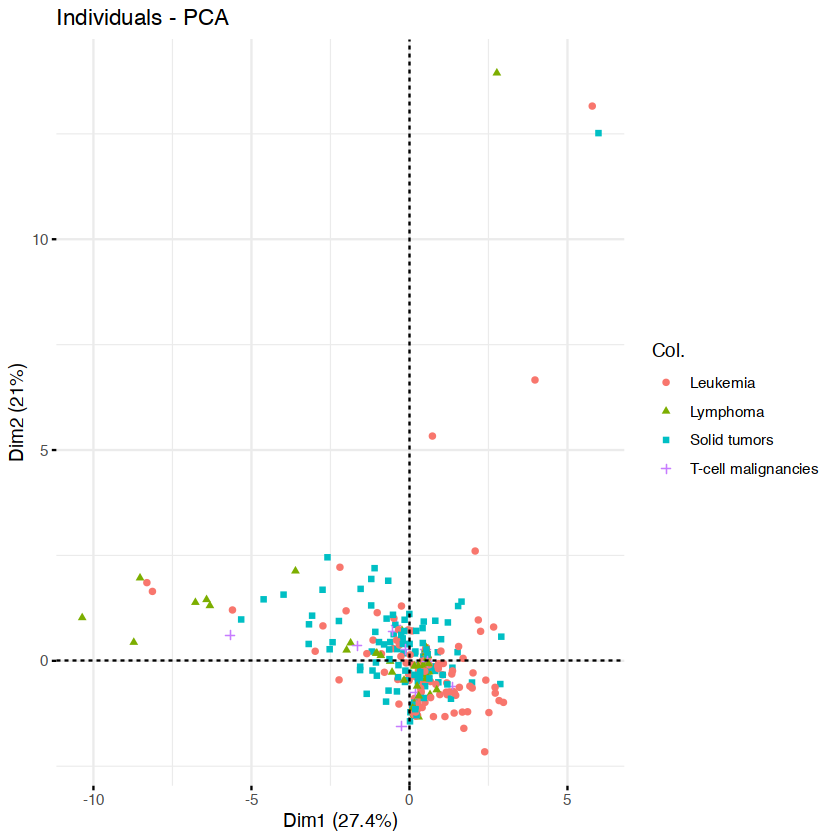

In [182]:
fviz_pca_ind(prcomp( trans[, colnames(mymat)]),
     col.ind = as.vector(imp_pbmc_hla_v_j_gliph$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE, mean.point = FALSE
)

In [183]:
pca_trans <- prcomp( trans[, colnames(mymat)])$x[,1:5]

In [184]:
head(pca_trans)

,PC1,PC2,PC3,PC4,PC5
CHP_319_05,0.5401223,0.0812415529,-0.1946104,0.77270778,0.3595410
CHP_323_03,0.5095763,-0.3202580757,-0.3878690,-0.16252943,0.1344389
CHP_323_05,0.5581015,-0.0008534011,-0.3183001,-0.03965704,0.1458892
CHP_324_05,0.5062719,0.2612002896,-0.1556392,0.78127532,0.3479664
CHP_328_04,0.2518919,-0.8985431931,-0.4752780,-0.23693364,0.1489254
CHP_328_05,0.5406522,0.0488154566,-0.3071431,-0.03569113,0.1424426


In [171]:
pcaraw_fit <- lrm( Relapse ~ pca_raw, data = imp_pbmc_hla_v_j_gliph ) 
pcatrans_fit <- lrm(Relapse ~ pca_trans, data = imp_pbmc_hla_v_j_gliph )

In [172]:
AIC(pcaraw_fit)
AIC(pcatrans_fit)

[1] 300.5087

[1] 301.7375

# Backup

In [ ]:
mymat <- pbmc_hla_v_j_gliph[, c(66,200:270)]
mymat <- cbind(mymat, pbmc_hla_v_j_gliph[,c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')])
# mymat <- pbmc_hla_v_j_gliph[,c('ATC', 'Naïve%','SCM%','CM%','EM%','TE%','PD1%','LAG3%','TIM3%')]
rownames(mymat) <- pbmc_hla_v_j_gliph$sample_id

In [ ]:
head(mymat, 10)

In [ ]:
# remove rows with all NAs
mymat <- mymat[ rowSums(is.na(mymat)) != ncol(mymat), ]
# rmeove those with only 0s and NAs
mymat <- mymat[ rowSums(mymat, na.rm = TRUE) != 0, ]

In [ ]:
# sample_df <- as.data.frame(sample_df)
rownames(pbmc_hla_v_j_gliph) <- pbmc_hla_v_j_gliph$sample_id

In [ ]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[ rownames(mymat), ]

In [ ]:
dim(pbmc_hla_v_j_gliph)

In [ ]:
dim(mymat)

In [ ]:
pbmc_hla_v_j_gliph <- pbmc_hla_v_j_gliph[ rownames(mymat), ]

In [ ]:
pbmc_hla_v_j_gliph$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph$cycle))

# PCA

In [ ]:
mymat_narm <- mymat[ rowSums(is.na(mymat)) == 0, ]
pbmc_hla_v_j_gliph_narm <- pbmc_hla_v_j_gliph[ rownames(mymat_narm), ]

In [ ]:
head(pbmc_hla_v_j_gliph_narm)

In [ ]:
myvars <- sort( Rfast::colVars(mymat_narm) , decreasing = TRUE)

In [ ]:
mymat_narm <- mymat_narm[ , names(myvars)[ myvars > 0]]

In [ ]:
dim(mymat_narm)
dim(mymat)


In [ ]:
#PCA
pca <- prcomp(mymat_narm, center = TRUE, scale. = TRUE)

In [ ]:
# plot PCA with factoextra
viz_pca <- fviz_pca_ind(pca,
    col.ind = as.vector(pbmc_hla_v_j_gliph_narm$cancergroup),
    # gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
    # remove labels
    label = "none",
    repel = TRUE, addEllipses = FALSE
)

In [ ]:
viz_pca# + coord_cartesian(xlim = c(-5, 5), ylim = c(-5, 5) )

In [ ]:
dim(mymat_narm)

In [ ]:
sum( summary(pca)$importance[2,1:5] )

In [ ]:
# scree plot
fviz_eig(pca)

In [ ]:
myx <- pca$x

In [ ]:
mydist <- as.matrix(dist(myx[,1:5]))

In [ ]:
head(mydist)

In [ ]:
# pbmc_hla_v_j_gliph_narm$cyclenum <- as.numeric(gsub("X0", "", pbmc_hla_v_j_gliph_narm$cycle))

In [ ]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm %>% group_by(Patient) %>% 
# order cyclenum
arrange(cyclenum) %>%
ungroup()

In [ ]:
pts <- names(which(table(sample_df_narm$Patient) > 1 ))

In [ ]:
sample_df_narm$dist <- NA

In [ ]:
sample_df_narm <- pbmc_hla_v_j_gliph_narm

In [ ]:
for (i in pts) {
    tmp <- sample_df_narm[sample_df_narm$Patient == i, ]
    # tmp <- tmp[ order(tmp$cyclenum, decreasing = F), ]
    distances_df <- mydist[tmp$sample_id, tmp$sample_id]
    if (nrow(tmp) == 2) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
    }
    if (nrow(tmp) == 3) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
    }
    if (nrow(tmp) == 4) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
    }
    if (nrow(tmp) == 5) {
        mydiff <- diff(tmp$cyclenum)
        if (mydiff[1] == 1) {
            tmp$dist[2] <- distances_df[tmp$sample_id[1], tmp$sample_id[2]]
        }
        if (mydiff[2] == 1) {
            tmp$dist[3] <- distances_df[tmp$sample_id[2], tmp$sample_id[3]]
        }
        if (mydiff[3] == 1) {
            tmp$dist[4] <- distances_df[tmp$sample_id[3], tmp$sample_id[4]]
        }
        if (mydiff[4] == 1) {
            tmp$dist[5] <- distances_df[tmp$sample_id[4], tmp$sample_id[5]]
        }
    }
    sample_df_narm$dist[sample_df_narm$Patient == i] <- tmp$dist
}


In [ ]:
# sample_df_narm$dist[is.na(sample_df_narm$dist)] <- 0

In [ ]:
head(sample_df_narm)

In [ ]:
allpts <- as.data.frame(table(sample_df_narm$Patient), stringsAsFactors = F)

In [ ]:
# sample_df_narm$Relapse[is.na(sample_df_narm$Relapse)] <- 0

In [ ]:
# t.test(sample_df_narm$dist[sample_df_narm$dist != 0] ~ sample_df_narm$Relapse[sample_df_narm$dist != 0])

In [ ]:
sample_df_narm[ sample_df_narm$Patient == "CHP_351",]

In [ ]:
sample_df_narm$dist[ sample_df_narm$dist == 0] <- NA

In [ ]:
allpts$sumdist <- NA
for(i in 1:nrow(allpts)){
    tmp <- as.data.frame(sample_df_narm[ sample_df_narm$Patient == allpts$Var1[i],] )
    allpts$sumdist[i] <- sum(tmp[ tmp$dist != 0, "dist"], na.rm = T)
}

In [ ]:
allpts$sumdist_n <- allpts$sumdist / allpts$Freq

In [ ]:
head(allpts, 10)

In [ ]:
allpts_no0 <- allpts[ allpts$sumdist_n > 0,]

In [ ]:
dim(allpts_no0)

In [ ]:
mysample_df <- sample_df_narm[ sample_df_narm$Patient %in% allpts_no0$Var1,]

In [ ]:
dim(mysample_df)

In [ ]:
mypatients <- mysample_df[!duplicated(mysample_df$Patient),]

In [ ]:
dim(mypatients)

In [ ]:
head(mypatients)

In [ ]:
head(allpts_no0)

In [ ]:
mypatients$sumdist_n <- allpts_no0$sumdist_n[ match(mypatients$Patient, allpts_no0$Var1)]
mypatients$sumdist <- allpts_no0$sumdist[ match(mypatients$Patient, allpts_no0$Var1)]

In [ ]:
# tmp$Relapse[ is.na(tmp$Relapse) ] <- 0

In [ ]:
dim(mypatients)

In [ ]:
head(mypatients, 10)

In [ ]:
myfit <- rms::lrm(Relapse ~ sumdist_n, data = mypatients)

In [ ]:
print(myfit)

In [ ]:
anova(myfit)

In [ ]:
mypatients <- mypatients[order(mypatients$sumdist_n),]

In [ ]:
makematrix_4hm <- function(df, var, name) {
    mymat <- df[[var]]
    names(mymat) <- df[["Patient"]]
    mymat <- t(as.matrix(mymat))
    rownames(mymat) <- name
    return(mymat)
}

In [ ]:
mycohort <- makematrix_4hm(mypatients, "Disease_type", "disease")
mysample <- makematrix_4hm(mypatients, "cancergroup", "cancergroup")
mygroup <- makematrix_4hm(mypatients, "Relapse", "Relapse")
# myatc <- makematrix_4hm(tmp, "ATC", "ATC")
myage <- makematrix_4hm(mypatients, "Age", "Age")

In [ ]:
age_col <- c("blue", "red")
# atc_col <- c("blue", "red")

In [ ]:
group_col <- c("blue", "red", "green")
names(group_col) <- names(table(mypatients$Relapse))

In [ ]:
# cohort_col <- c("blue", "red", "green", "orange", "purple", "yellow", "black", "grey", "pink", 
# "brown", "cyan", "magenta", "navy", "maroon", "gray","gold", "darkgreen") 
# names(cohort_col) <- names(table(allpbmcs$Disease_type))

In [ ]:
type_col <- c("blue", "red", "green", "orange", "purple")
names(type_col) <- names(table(mypatients$cancergroup))

In [ ]:
age_hm <- Heatmap(myage, col = age_col,  height = unit(1,"cm"))
# atc_hm <- Heatmap(myatc, col = atc_col,  height = unit(1,"cm"))

In [ ]:
cohort_hm <- Heatmap(mycohort, col = cohort_col, height = unit(1,"cm"))
sample_hm <- Heatmap(mysample, col = type_col, height = unit(1,"cm"))
group_hm <- Heatmap(mygroup, col = group_col,  height = unit(1,"cm"))

In [ ]:
# length(unique(sample_df_narm$Patient))

In [ ]:
# tail(sample_df_narm[, c("sample_id", "cycle", "dist")])

In [ ]:
# pivot_wider
 
wider_df <- tidyr::pivot_wider(mysample_df, names_from = cycle, values_from = dist, id_cols = Patient) 

wider_df[ wider_df$Patient == "CHP_350",]

In [ ]:
wider_df <- as.data.frame(wider_df)
rownames(wider_df) <- wider_df$Patient
wider_df$Patient <- NULL
wider_df$X01 <- NULL

In [ ]:
head(wider_df)

In [ ]:
hm1 <- Heatmap(t(scale(wider_df)), cluster_columns = F, name = "dists")

In [ ]:
dim(wider_df)

In [ ]:
hm <- Heatmap(t(scale(mypatients$sumdist_n)), cluster_columns = F)

In [ ]:
dim(mypatients)

In [ ]:
hm %v% hm1 %v% sample_hm %v% group_hm %v% age_hm 

In [ ]:
ls()

In [ ]:
rm(tmp, wider_df, pts, myx, mysample, mysample_df, allpts, allpts_no0, distances_df, hm, hm1, i, mydiff, mydist, myfit, mymat_narm, pca, sample_df_narm)